In [1]:
using BSON
using BSON: @save, @load
using Flux
using Plots

In [2]:
include("src/NN_Extender.jl")

Main.NN_Extender

In [3]:
NN_Extender.main()

///////////////////////////////////////////////////////////////////////////////
                                Extender
///////////////////////////////////////////////////////////////////////////////
    
Neural Network would be changed from:
File: model-iter-101.bson
Activations: ["identity", "relu", "relu", "identity"]
Structure: [8, 30, 30, 30, 1]
Bias: false
Float64: true
To:
Saved to file: output_model.bson
Activations: ["identity", "relu", "relu", "identity"]
Structure: [13, 30, 30, 30, 1]
Bias: false
Float64: true


In [4]:
model = nothing
BSON.@load "model-iter-101.bson" model

In [5]:
model

Chain(
  Dense(8 => 30; bias=false),           # 240 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 1; bias=false),           # 30 parameters
)                   # Total: 4 arrays, 2_070 parameters, 16.516 KiB.

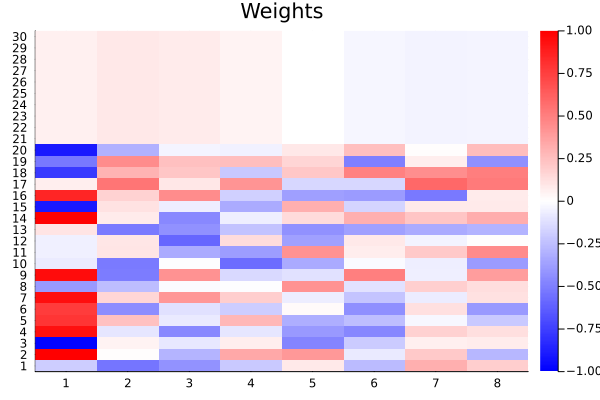

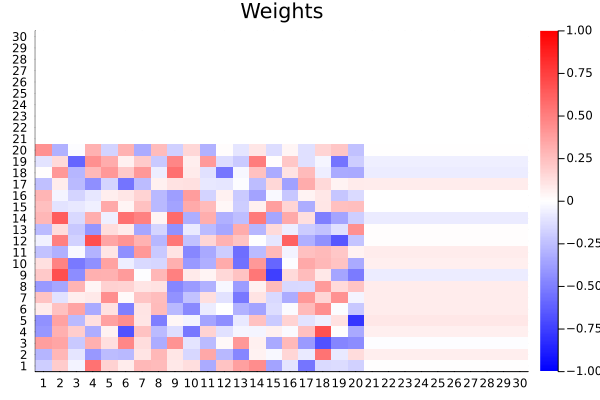

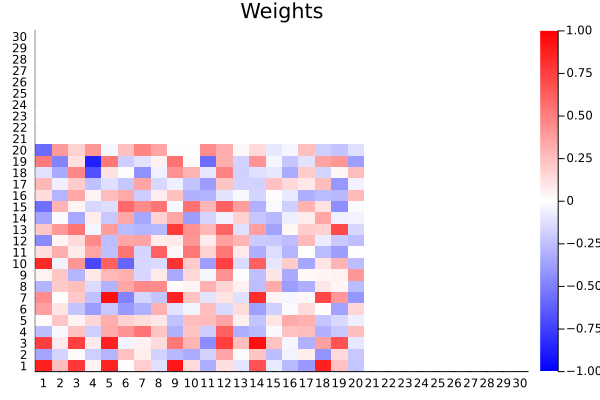

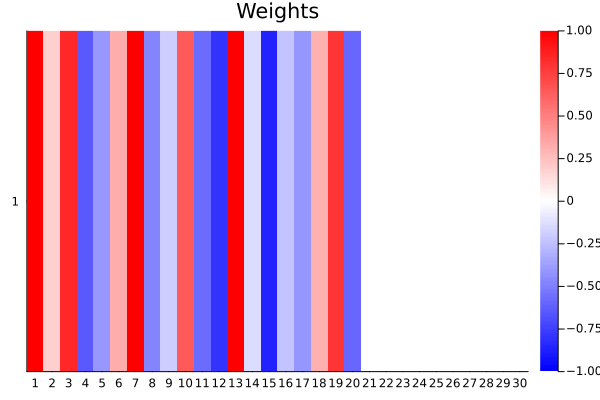

In [6]:
NN_Extender.plot_model_parameters(model)

In [7]:
model = nothing
BSON.@load "output_model.bson" model


In [8]:
model

Chain(
  Dense(13 => 30; bias=false),          # 390 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 1; bias=false),           # 30 parameters
)                   # Total: 4 arrays, 2_220 parameters, 17.688 KiB.

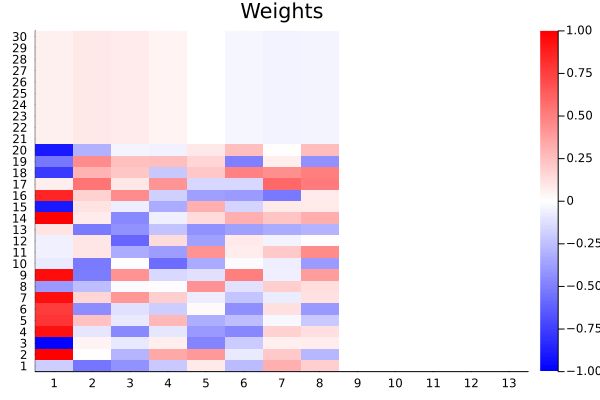

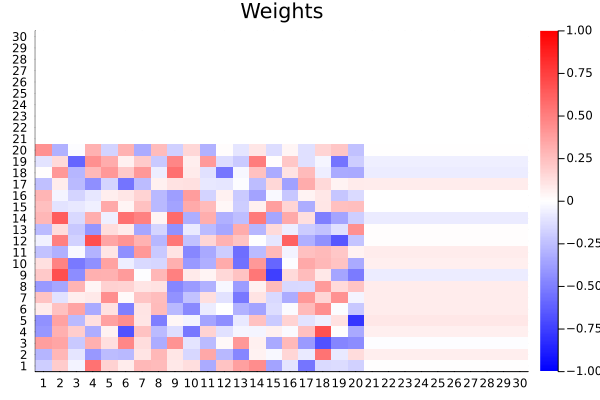

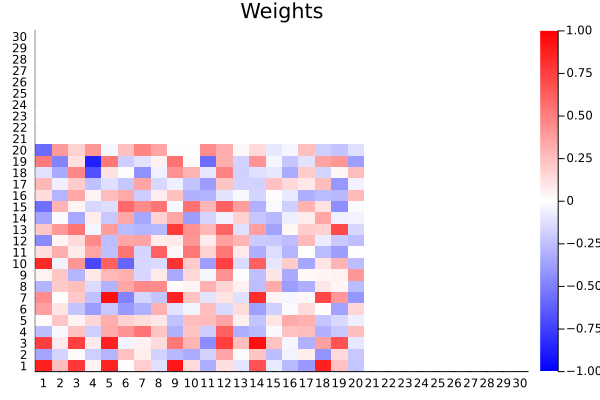

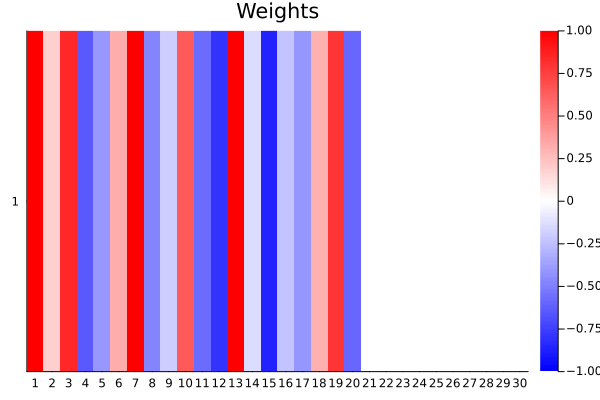

In [9]:
NN_Extender.plot_model_parameters(model)

# Testing

In [10]:
model = nothing
output_model = nothing

BSON.@load "output_model.bson" model
output_model = model
model = nothing
BSON.@load "model-iter-101.bson" model



mul = 1
n1 = size(model.layers[1].weight)[2]
n2 = size(output_model.layers[1].weight)[2]


for i in 1:1000
    input_vector1 = rand(n1) .* mul
    v_2 = rand(n2 - n1) .* mul
    input_vector2 = vcat(input_vector1, v_2)
    result1 = model(input_vector1)
    result2 = output_model(input_vector2)
    if abs(result1[1] - result2[1]) > 0.00000001
        println("❌ Failed test!")
        println("Input model result: $(result1[1])")
        println("Output model result: $(result2[1])")
        println("Difference: $(abs(result1[1] - result2[1]))")
    end
    mul *= -1
end


In [11]:
# One test
input_vector1 = rand(n1) .* mul
v_2 = rand(n2 - n1) .* mul
input_vector2 = vcat(input_vector1, v_2)
result1 = model(input_vector1)
result2 = output_model(input_vector2)
println("Input model result: $(result1[1])")
println("Output model result: $(result2[1])")

Input model result: 27.079174183210565
Output model result: 27.079174183210565


In [12]:
model

Chain(
  Dense(8 => 30; bias=false),           # 240 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 1; bias=false),           # 30 parameters
)                   # Total: 4 arrays, 2_070 parameters, 16.516 KiB.

In [13]:
output_model

Chain(
  Dense(13 => 30; bias=false),          # 390 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 30, relu; bias=false),    # 900 parameters
  Dense(30 => 1; bias=false),           # 30 parameters
)                   # Total: 4 arrays, 2_220 parameters, 17.688 KiB.